## Проект "Разведывательный анализ данных"
## Project EDA

### Основная задача проекта: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. С целью определиться с параметрами модели для предсказания результатов экзамена по математике, ниже будет проведен разведывательный анализ данных.

### In this project EDA was performed to choose the values for the future model, predicting the math score of the students based on their living conditions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
stud = pd.read_csv('stud_math.xls')

In [3]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [5]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
# переименовываем колонки для удобства
# renaming of columns 
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures',
                'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out', 'health', 'absences', 'score']

In [7]:
stud.head(5)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [8]:
# функции для обработки столбцов
# columns processing functions

def fix_job(x):
    """function to replace str in job column with int"""
    if x == None or x == "NaN":
        x = None
    elif x == 'at_home':
        x = 1
    elif x == 'health':
        x = 2
    elif x == 'teacher':
        x = 3
    elif x == 'services':
        x = 4
    else:
        x = 0
    return x


def fix_reason(x):
    """function to replace str in reason column with int"""
    if x == None or x == "NaN":
        x = None
    elif x == 'course':
        x = 1
    elif x == 'home':
        x = 2
    elif x == 'reputation':
        x = 3
    else:
        x = 0
    return x


def fix_guardian(x):
    """function to replace str in guardian column with int"""
    if x == None or x == "NaN":
        x = None
    elif x == 'mother':
        x = 1
    elif x == 'father':
        x = 2
    else:
        x = 0
    return x


def get_stat_dif(column):
    """function to calculate the T-test"""
    cols = stud.loc[:, column].value_counts().index[:6]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    """function to create boxplot"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Обработка столбцов / Columns processing

## school

In [9]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [10]:
stud.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Выводы: в столбце два уникальных значения, пустые ячейки отсутствуют. 
#### Findings: there are 2 unique values, no missing values

## sex

In [11]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


In [12]:
stud.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Выводы: в столбце два уникальных значения, пустые ячейки отсутствуют
#### Findings: there are 2 unique values, no missing values

## age

In [13]:
stud.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

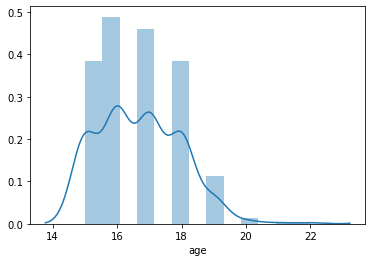

In [14]:
sns.distplot(stud.age)
stud.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


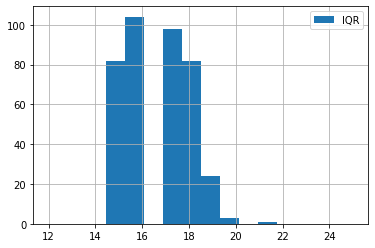

In [15]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(12, 25),
                                                                        label='IQR')
plt.legend()

In [16]:
stud[(stud.age > 21) | (stud.age < 13)].age.count()

1

In [17]:
stud = stud.loc[stud.age <= 21]

### выводы:
#### Бимодальное распределение. Пустые ячейки отсутствуют. Был удален 1 выброс за верхней границей
#### Bimodal distribution, 1 outlier deleted.

## address

In [18]:
pd.DataFrame(stud.address.value_counts())

,address
U,294
R,83


In [19]:
stud.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [20]:
#заполним столбец "adress" наиболее часто встречающимся значением
stud.loc[:, ['address']] = stud['address'].fillna('U')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, которые мы заполнили наиболее часто встречающимся значением
#### Findings: there are 2 unique values, relatively small amount of missing values filled with most popular value

## fam_size

In [21]:
pd.DataFrame(stud.fam_size.value_counts())

,fam_size
GT3,260
LE3,107


In [22]:
stud.loc[:, ['fam_size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [23]:
#заполним столбец "fam_size" значением 'none'
stud.loc[:, ['fam_size']] = stud['fam_size'].fillna('none')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, которые мы заполнили значением "none"
#### Findings: there are 2 unique values, relatively small amount of missing values filled with "none"

## p_status

In [24]:
pd.DataFrame(stud.p_status.value_counts())

,p_status
T,313
A,36


In [25]:
stud.loc[:, ['p_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  349 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [26]:
#заполним столбец "p_status" наиболее часто встречающимся значением
stud.loc[:, ['p_status']] = stud['p_status'].fillna('T')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, которые мы заполнили наиболее часто встречающимся значением
#### Findings: there are 2 unique values, relatively small amount of missing values  filled with most popular value

## m_edu

In [27]:
pd.DataFrame(stud.m_edu.value_counts())

,m_edu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


In [28]:
stud.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [29]:
#удалим 3 строки, которые содержат пустые ячейки
stud = stud.dropna(subset=['m_edu'])

#### Выводы: в столбце пять уникальных значений, есть небольшое количество 3 пустых ячейки, которые были удалены
#### Findings: there are 5 unique values, 3 missing values, which were deleted

## f_edu

In [30]:
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,105
3.0,95
4.0,88
1.0,76
0.0,2
40.0,1


In [31]:
stud[stud.f_edu == 40].f_edu.count()

1

In [32]:
stud = stud.loc[stud.f_edu != 40.0]  # удаляем некорректное значение 40.0

In [33]:
stud.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [34]:
#заполним столбец "f_edu" новым значением "5.0"
stud.loc[:, ['f_edu']] = stud['f_edu'].fillna(5.0)

#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек, заполненных новым значением 5.0. Удалено 1 некорректное значение 40.0
#### Findings: there are 5 unique values, relatively small amount of missing values, which were replaced with new value 5.0. 1 incorrect value of 40.0 deleted

## m_job

In [35]:
pd.DataFrame(stud.m_job.value_counts())

,m_job
other,131
services,95
at_home,58
teacher,55
health,32


In [36]:
stud.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   371 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [37]:
#заполним столбец "m_job" значением "other"
stud.loc[:, ['m_job']] = stud['m_job'].fillna('other')

#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек, которые были заполнены значением "other"
#### Findings: there are 5 unique values, relatively small amount of missing values, replaced by "other"

## f_job

In [38]:
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,195
services,99
teacher,29
at_home,16
health,15


In [39]:
stud.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   354 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [40]:
#заполним столбец "f_job" значением "other"
stud.loc[:, ['f_job']] = stud['f_job'].fillna('other')

#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек, которые были заполнены значением "other"
#### Findings: there are 5 unique values, relatively small amount of missing values, replaced by "other"

## reason

In [41]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,103
reputation,100
other,33


In [42]:
stud.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [43]:
#заполним столбец "reason" значением "other"
stud.loc[:, ['reason']] = stud['reason'].fillna('other')

#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек, которые были заполнены новым значением "none"
#### Findings: there are 4 unique values, relatively small amount of missing values, replaced by "none"

## guardian

In [44]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,248
father,83
other,28


In [45]:
stud.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  359 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [46]:
#заполним столбец "guardian" значением "other"
stud.loc[:, ['guardian']] = stud['guardian'].fillna('other')

#### Выводы: в столбце три уникальных значения, есть небольшое количество пустых ячеек, заполненных "other"
#### Findings: there are 3 unique values, relatively small amount of missing values, replaced by "other"

## travel_time

In [47]:
pd.DataFrame(stud.travel_time.value_counts())

,travel_time
1.0,238
2.0,96
3.0,21
4.0,7


In [48]:
stud.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  362 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [49]:
#заполним столбец "travel_time" наиболее часто встречающимся значением 1.0
stud.loc[:, ['travel_time']] = stud['travel_time'].fillna(1.0)

#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек, заполненных 1.0.
#### Findings: there are 4 unique values, relatively small amount of missing values, replaced by 1.0.

## study_time

In [50]:
pd.DataFrame(stud.study_time.value_counts())

,study_time
2.0,192
1.0,101
3.0,63
4.0,27


In [51]:
stud.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  383 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [52]:
#удалим 7 строк, кот. содержат незаполненные ячейки
stud = stud.dropna(subset=['study_time'])

#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек, которые были удалены
#### Findings: there are 4 unique values, relatively small amount of missing values, which were deleted

## failures

In [53]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,286
1.0,47
2.0,15
3.0,14


In [54]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  362 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [55]:
#заполним столбец "failures" наиболее часто встречающимся значением 0.0
stud.loc[:, ['failures']] = stud['failures'].fillna(0.0)

#### Выводы: в столбце четыре уникальных значения, есть небольшое количество пустых ячеек, заполненных "0"
#### Findings: there are 4 unique values, relatively small amount of missing values, replaced by "0"

## school_sup

In [56]:
pd.DataFrame(stud.school_sup.value_counts())

,school_sup
no,326
yes,48


In [57]:
stud.loc[:, ['school_sup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  374 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [58]:
#заполним столбец "school_sup" наиболее часто встречающимся значением 'no'
stud.loc[:, ['school_sup']] = stud['school_sup'].fillna('no')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных "no"
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by"no"

## fam_sup

In [59]:
pd.DataFrame(stud.fam_sup.value_counts())

,fam_sup
yes,215
no,130


In [60]:
stud.loc[:, ['fam_sup']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  345 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [61]:
#заполним столбец "fam_sup" значением 'other'
stud.loc[:, ['fam_sup']] = stud['fam_sup'].fillna('other')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных other
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by "other"

## paid

In [62]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,192
yes,151


In [63]:
stud.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    343 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [64]:
#заполним столбец "paid" значением 'other'
stud.loc[:, ['paid']] = stud['paid'].fillna('other')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных "other"
#### Findings: there are 2 unique values, relatively small amount of missing values, заполненных "other"

## activities

In [65]:
pd.DataFrame(stud.activities.value_counts())

,activities
yes,188
no,181


In [66]:
stud.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  369 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [67]:
#заполним столбец 'activities'значением 'other'
stud.loc[:, ['activities']] = stud['activities'].fillna('other')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных "other"
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by "other"

## nursery

In [68]:
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,291
no,76


In [69]:
stud.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  367 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [70]:
#заполним столбец "paid",'activities'.'nursery' значением 'yes'
stud.loc[:, ['nursery']] = stud['nursery'].fillna('yes')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных "yes"
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by "yes"

## studytime_granular

In [71]:
pd.DataFrame(stud.studytime_granular.value_counts())

,studytime_granular
-6.0,192
-3.0,101
-9.0,63
-12.0,27


In [72]:
stud.loc[:, ['studytime_granular']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  383 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


#### Выводы: в столбце четыре уникальных значения, пустых ячеек нет
#### Findings: there are 4 unique values, no missing values

## higher

In [73]:
pd.DataFrame(stud.higher.value_counts())

,higher
yes,347
no,17


In [74]:
stud.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  364 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [75]:
#заполним столбец "higher"наиболее часто встречающимся значением 'yes'
stud.loc[:, ['higher']] = stud['higher'].fillna('yes')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных "yes"
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by "yes"

## internet

In [76]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,296
no,54


In [77]:
stud.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  350 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [78]:
#заполним столбец "internet" наиболее часто встречающимся значением 'yes'
stud.loc[:, ['internet']] = stud['internet'].fillna('yes')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных "yes"
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by "yes"

## romantic 

In [79]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,233
yes,122


In [80]:
stud.loc[:, ['romantic']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  355 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [81]:
#заполним столбец "romantic" значением 'other'
stud.loc[:, ['romantic']] = stud['romantic'].fillna('other')

#### Выводы: в столбце два уникальных значения, есть небольшое количество пустых ячеек, заполненных новым значением "other"
#### Findings: there are 2 unique values, relatively small amount of missing values, replaced by "other"

## fam_rel	

In [82]:
pd.DataFrame(stud.fam_rel.value_counts())

,fam_rel
4.0,179
5.0,93
3.0,59
2.0,17
1.0,7
-1.0,1


In [83]:
stud.loc[:, ['fam_rel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  356 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [84]:
#заполним столбец "fam_rel" новым значением 6.0
stud.loc[:, ['fam_rel']] = stud['fam_rel'].fillna(6.0)

#### Выводы: в столбце шесть уникальных значений, есть небольшое количество пустых ячеек, заполненных новым значением 6.0
#### Findings: there are 6 unique values, relatively small amount of missing values, replaced by 6.0

## free_time

In [85]:
pd.DataFrame(stud.free_time.value_counts())

,free_time
3.0,149
4.0,110
2.0,62
5.0,35
1.0,17


In [86]:
stud.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  373 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [87]:
#заполним столбец "free_time"наиболее часто встречающимся значением 3.0
stud.loc[:, ['free_time']] = stud['free_time'].fillna(3.0)

#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек, заполненных 3.0
#### Findings: there are 5 unique values, relatively small amount of missing values, replaced by 3.0

## go_out	

In [88]:
pd.DataFrame(stud.go_out.value_counts())

,go_out
3.0,126
2.0,96
4.0,82
5.0,49
1.0,23


In [89]:
stud.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  376 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [90]:
#заполним столбец 'go_out' наиболее часто встречающимся значением 3.0
stud.loc[:, ['go_out']] = stud['go_out'].fillna(3.0)

#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек, заполненных 3.0
#### Findings: there are 5 unique values, relatively small amount of missing values, replaced by 3.0

## health

In [91]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,136
3.0,87
4.0,60
1.0,45
2.0,41


In [92]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  369 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [93]:
#заполним столбец "health' наиболее часто встречающимся значением 5.0
stud.loc[:, ['health']] = stud['health'].fillna(5.0)

#### Выводы: в столбце пять уникальных значений, есть небольшое количество пустых ячеек, заполненных 5.0
#### Findings: there are 5 unique values, relatively small amount of missing values, replaced by 5.0

## absences

In [94]:
stud.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  373 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


count    373.000000
mean       7.308311
std       23.764500
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

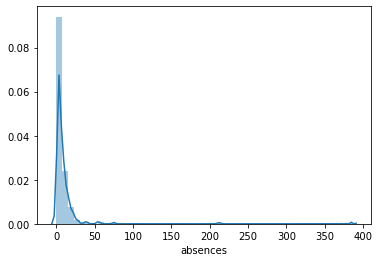

In [95]:
sns.distplot(stud.absences)
stud.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


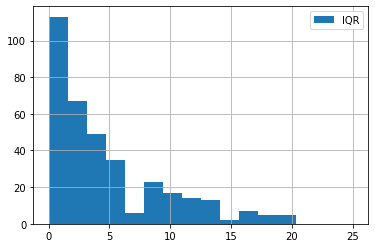

In [96]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 25),
                                                                                  label='IQR'),
plt.legend()

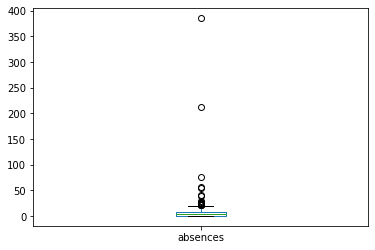

In [97]:
stud.absences.plot.box()  # boxplot to visualise outliers

In [98]:
stud.loc[stud.absences > 50].absences.count()

5

In [99]:
stud = stud.loc[stud.absences <= 50]

In [100]:
#заполним столбец "absences' наиболее часто встречающимся значением 0.0
stud.loc[:, ['score']] = stud['score'].fillna(5.0)

#### Выводы: распределение смещенное вправо. Были удалены 5 выбросов за верхней границей, небольшое количество пустых ячеек заполнено 0.0.
#### Findings: positive skewed distribution. 5 outliers deleted, relatively small amount of missing values, replaced by 0.0

## score

In [101]:
stud.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   368 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


count    368.000000
mean      51.426630
std       23.369209
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

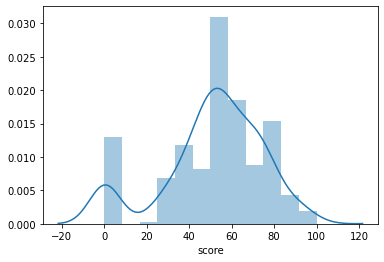

In [102]:
sns.distplot(stud.score)
stud.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


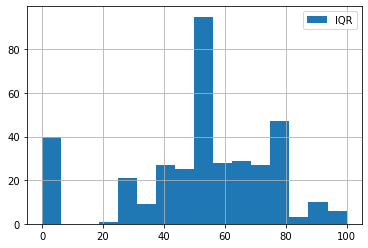

In [103]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 100),
                                                                            label='IQR')
plt.legend()

In [104]:
# заполним пустые значения 0.0
stud.loc[:, ['score']] = stud['score'].fillna(0.0)

#### Выводы: в целом нормальное распределение. Выбросов нет. Было удалено значительное количество "0" оценок
#### Findings: normal distribution after zero scores were deleted

In [105]:
# заменим значения в столбцах 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' на 1,2,3:
dict_r = {'yes': 1.0, 'no': 0.0, 'other': 3.0, 'none': 4.0}
for col in ['school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    stud.loc[:,col] = stud.loc[:,col].replace(to_replace=dict_r)

### Выводы: в целом, данные относительно чистые, выбросов и пустых значений немного
### Findings: data in the dataset is quite clean, there are not many outliers and missing values

## Вариант 1
## Variant 1

## Корреляционный анализ количественных переменных
## Correlation analisys of numerical data

In [106]:
#сделаем копию датафрейма для анализа и отберем только строки где средний балл больше 0, т.е. студенты пришли на экзамен
stud1 = stud[stud['score']>0]

In [107]:
stud1.head(5)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,none,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,-6.0,1.0,1.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-6.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,3.0,0.0,1.0,-6.0,1.0,1.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,-9.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A18B261C0>,
      dtype=object)

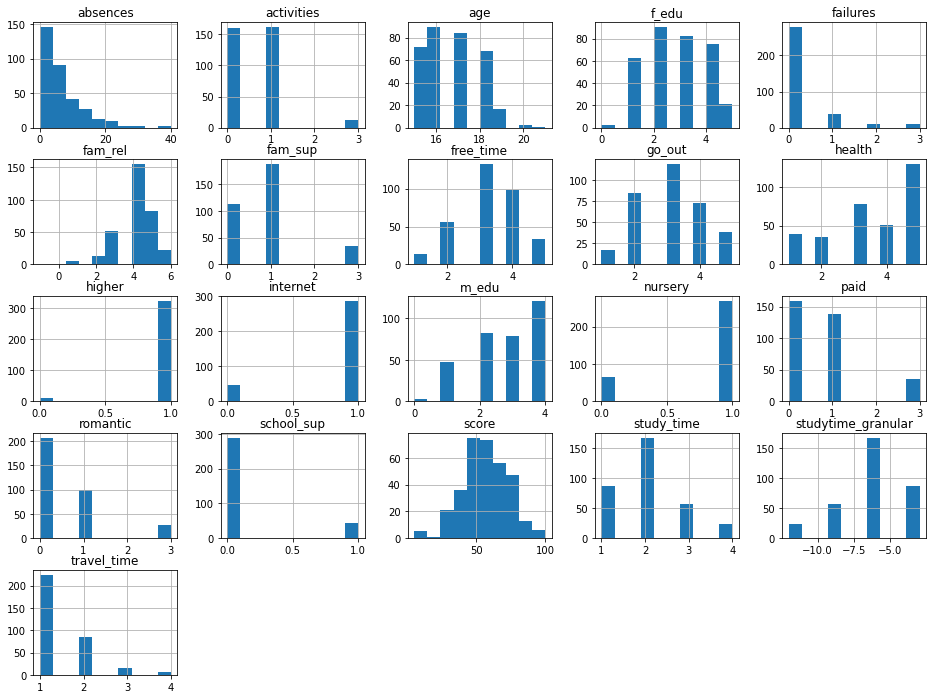

In [108]:
# histogramms to see numerical values distribution
stud1.hist(alpha=1, figsize=(16, 12))

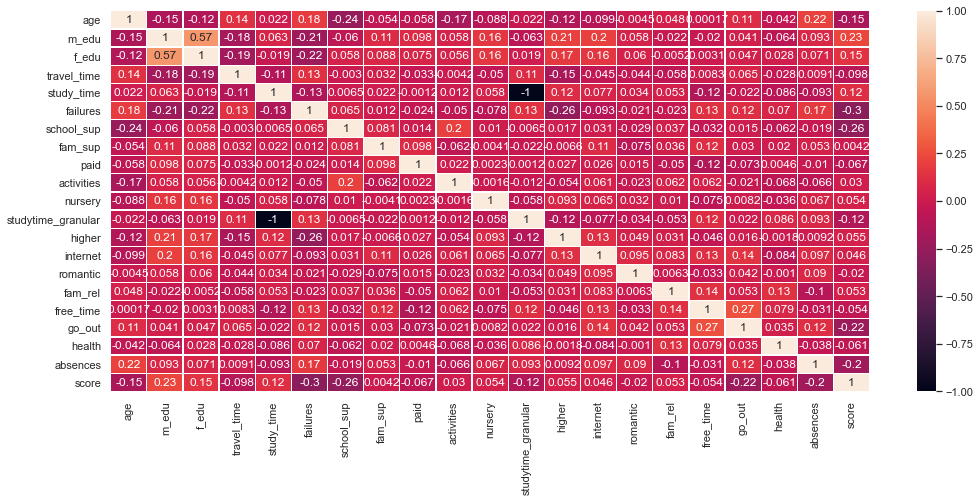

In [109]:
sns.set()
fig, ax = plt.subplots(figsize=(17, 7))
sns.heatmap(stud1.corr(), annot = True, linewidths=.25, ax=ax)

### Выводы: по результатам анализа heatmap можно выделить показатели "age", "m_edu","f_edu", "study_time, "failures", "school_sup","go_out", "absences" как оказывающие влияние на показатель "score". Переменные "study_time" и "studytime_granular" полностью обратно скоррелированы, необходимо использовать только один из них 
### Findings: based on heatmap visual analysis there is correlation between values "age", "m_edu","f_edu", "study_time, "failures", "school_sup","go_out", "absences". As values "study_time" and "studytime_granular" are perfectly negatively correlated, "studytime_granular" is excluded.

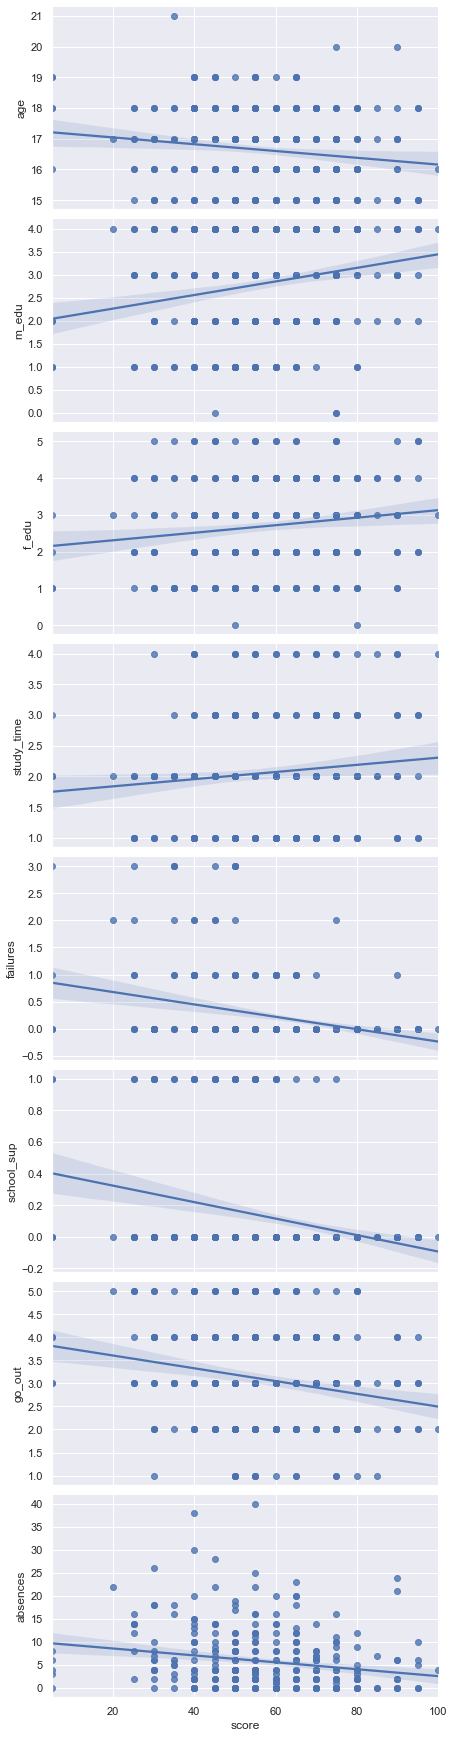

In [110]:
sns.pairplot(stud1, x_vars=['score'], y_vars=["age", "m_edu", "f_edu", "study_time", "failures",
                                              "school_sup", "go_out", "absences"], kind='reg', height=3, aspect=2)

### Выводы: по результатам анализа pairplot видно, что есть взаимосвязь между показателями "age", "m_edu","f_edu", "study_time, "failures", "school_sup","go_out", "absences"  и показателем "score". 
### Findings: based on pairplot visual analysis there is correlation between "age", "m_edu","f_edu", "study_time, "failures", "school_sup","go_out", "absences" and "score".

In [111]:
#посчитаем коэффициенты корреляции
#let's calculate correlation coefficient
corr = stud1.corr()

In [112]:
corr['score'].sort_values(ascending=False)

score                 1.000000
m_edu                 0.228692
f_edu                 0.145158
study_time            0.118607
higher                0.054650
nursery               0.054269
fam_rel               0.053102
internet              0.045770
activities            0.029506
fam_sup               0.004226
romantic             -0.020352
free_time            -0.053579
health               -0.060619
paid                 -0.066858
travel_time          -0.098210
studytime_granular   -0.118607
age                  -0.154193
absences             -0.199512
go_out               -0.222800
school_sup           -0.263768
failures             -0.300960
Name: score, dtype: float64

### Выводы: переменные, коэффициенты корреляции которых составляют менее 0,1, не оказывают существенного влияния на значение среднего балла и эти переменные можно опустить при построении модели:

### Findings: following values with corr() less then 0.1 can be dropped in the model:

- higher;
- nursery;
- fam_rel;
- internet;
- activities;
- fam_sup;
- romantic;
- free_time;
- health;
- paid;
- travel_time

## Анализ номинативных переменных
## Non-numeric data analysis

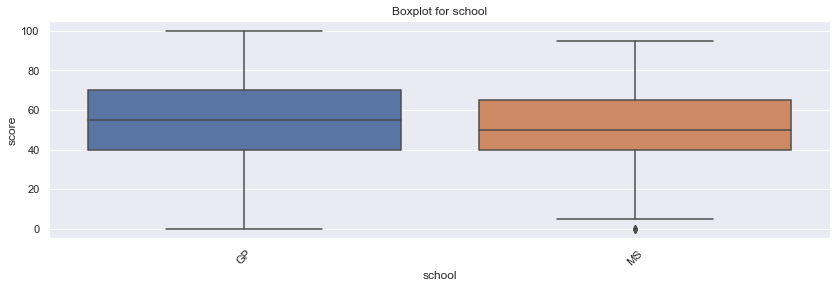

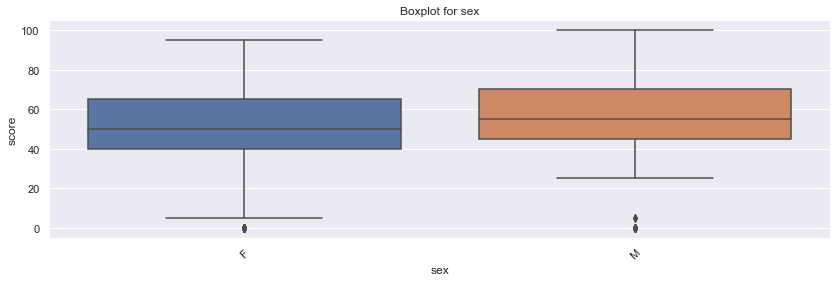

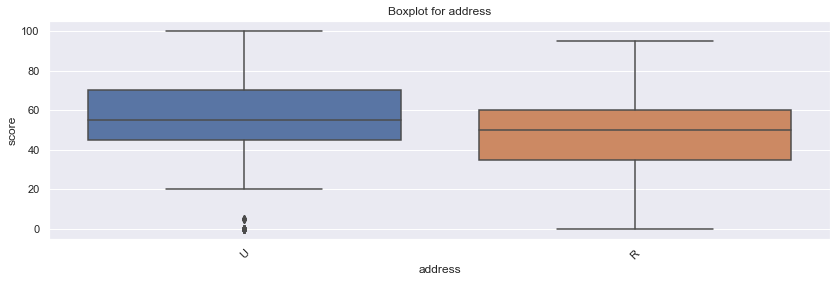

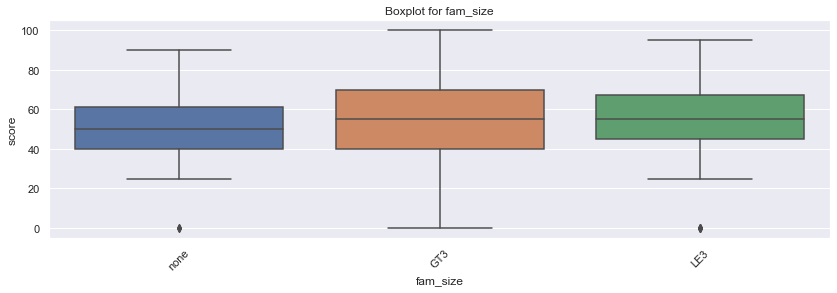

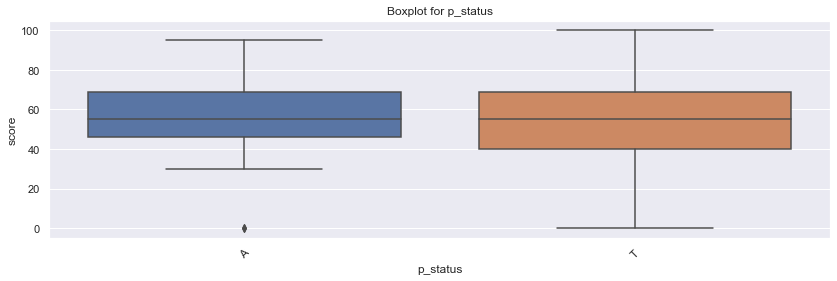

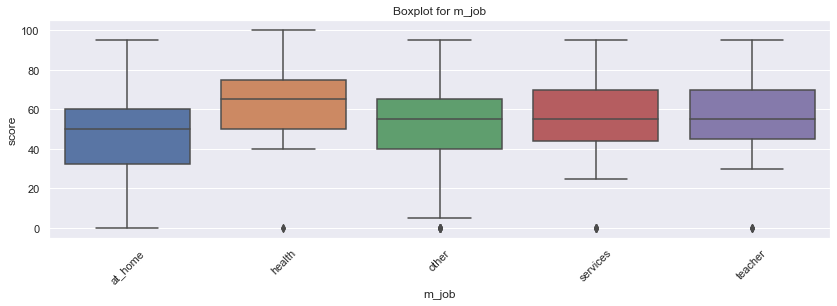

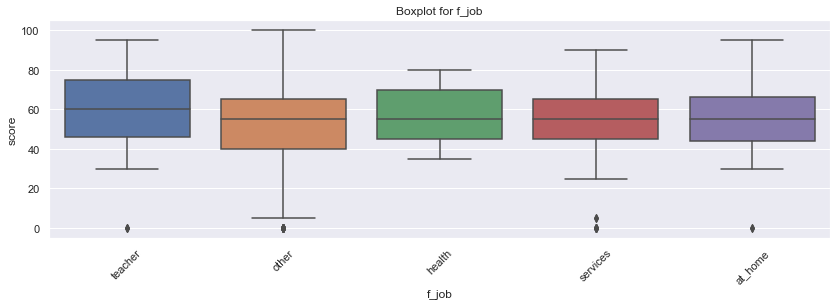

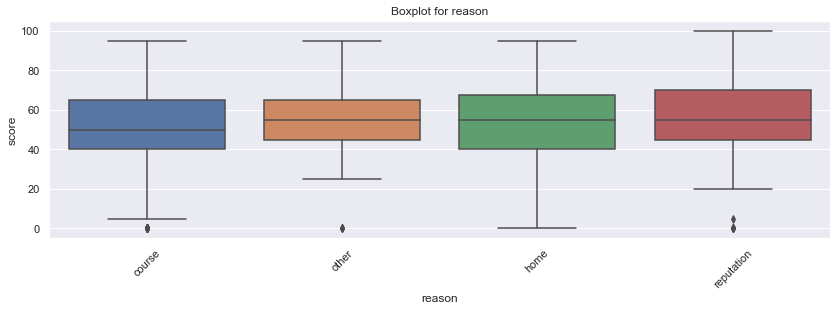

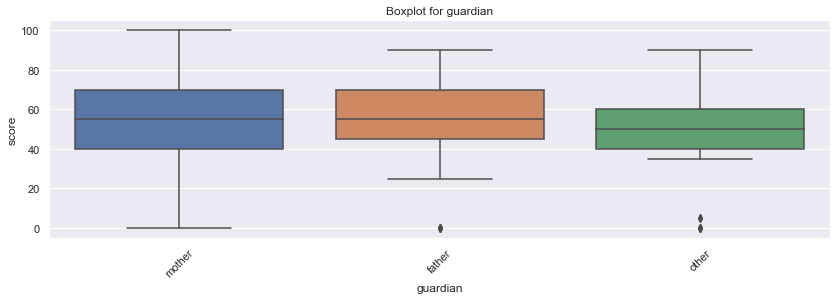

In [113]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian']:
    get_boxplot(col)

### Выводы: из анализа графиков видно, что наблюдается корреляция у таких переменных, как sex, adress и m_job с переменной score
### Findings: visually is evident there is correlation between sex, adress, m_job and score

In [114]:
for col in  ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian']:
    get_stat_dif(col)  # T-test calculatiion

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job


## Вывод: по результатам анализа для построения модели логично использовать переменные: "age", "m_edu","f_edu", "study_time, "failures", "school_sup","go_out", "absences", "sex", "address", "m_job" и 'score'

## Findings: based on the analysis results we should include   результатам анализа для построения модели логично использовать переменные: "age", "m_edu","f_edu", "study_time, "failures", "school_sup","go_out", "absences", "sex", "address", "m_job" и 'score' in the model

In [115]:
stud_for_model = stud1[["age", "m_edu", "f_edu", "study_time", "failures", "school_sup",
                        "go_out", "absences", "sex", "address", "m_job", "score"]]  # DataFrame for the model

In [116]:
stud_for_model.head(5)

,age,m_edu,f_edu,study_time,failures,school_sup,go_out,absences,sex,address,m_job,score
0,18,4.0,4.0,2.0,0.0,1.0,4.0,6.0,F,U,at_home,30.0
1,17,1.0,1.0,2.0,0.0,0.0,3.0,4.0,F,U,at_home,30.0
2,15,1.0,1.0,2.0,3.0,1.0,2.0,10.0,F,U,at_home,50.0
3,15,4.0,2.0,3.0,0.0,0.0,2.0,2.0,F,U,health,75.0
4,16,3.0,3.0,2.0,0.0,0.0,2.0,4.0,F,U,other,50.0


# Вариант 2
# Variant 2

### По результатам анализа данных в колонках видно, что у всех номинативных переменных относительно небольшое число уникальных значений (не более 5), поэтому можно заменить эти значения числовыми для удобства обработки и построения модели

### Based on the data analysis is clear that all non-numerical data has not more than 5 unique values, so we can replace them with relevant numeric values for the future model

In [117]:
stud.school = stud.school.apply(
    lambda x: 1 if x == 'GP' else 0)
stud.sex = stud.sex.apply(
    lambda x: 1 if x == 'F' else 0)
stud.address = stud.address.apply(
    lambda x: 1 if x == 'U' else 0)
stud.fam_size = stud.fam_size.apply(
    lambda x: 2 if x == 'GT3' else 1 if x == 'LE3' else 0)
stud.p_status = stud.p_status.apply(
    lambda x: 1 if x == 'A' else 0)
stud.m_job = stud.m_job.apply(fix_job)
stud.f_job = stud.f_job.apply(fix_job)
stud.reason = stud.reason.apply(fix_reason)
stud.guardian = stud.guardian.apply(fix_guardian)

#сделаем копию датафрейма для анализа и отберем только строки где средний балл больше 0, т.е. студенты пришли на экзамен
stud2 = stud[stud['score']>0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A199EE280>,
      dtype=object)

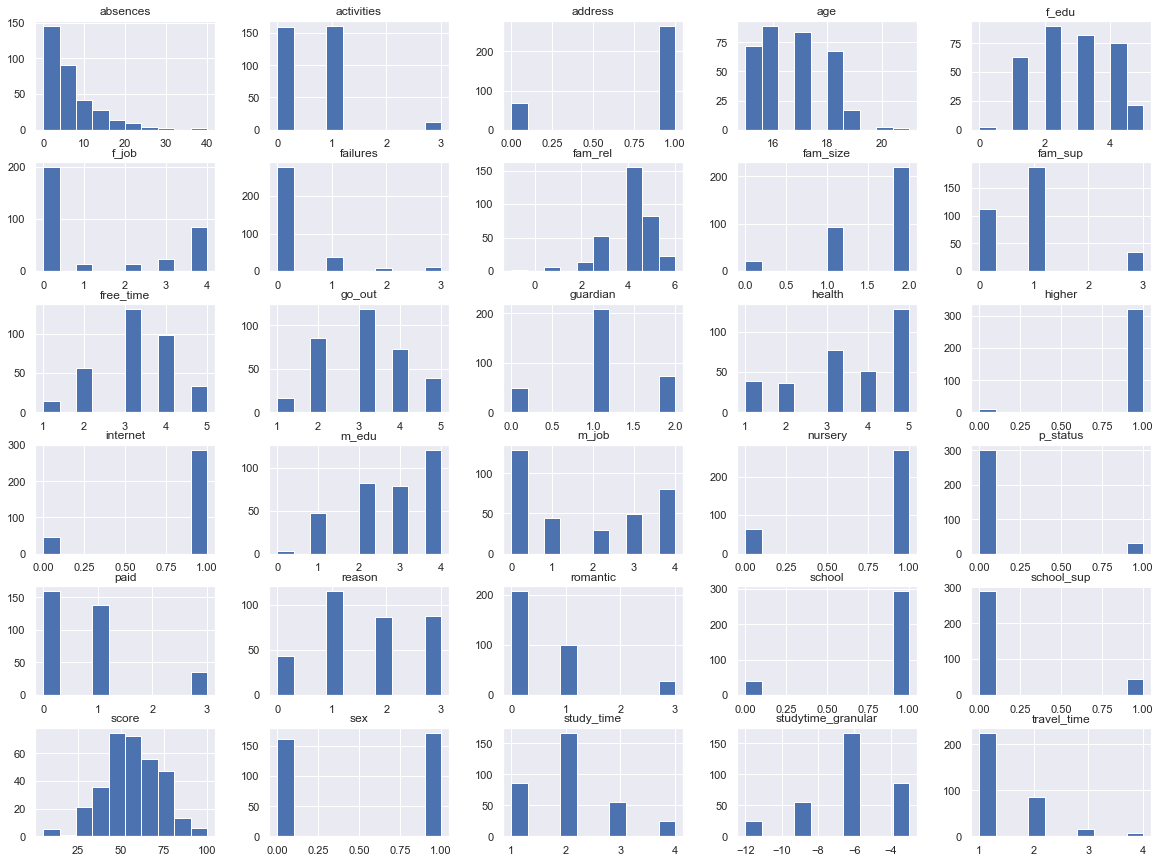

In [118]:
stud2.hist(alpha=1, figsize=(20, 15))

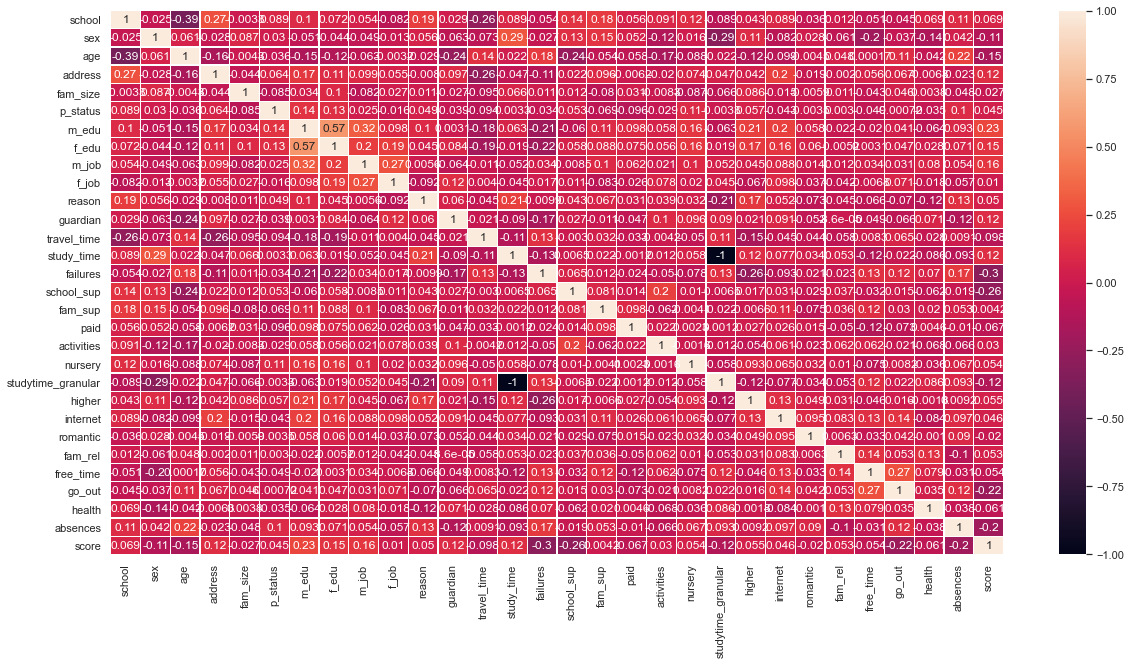

In [119]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(stud2.corr(), annot = True, linewidths=.25, ax=ax)

### Выводы: по результатам анализа heatmap визуально видно, что есть корреляция между переменными sex, age, address, m_edu, f_edu, m_job, guardian, failures, school_sup, study_time, go_out, absences и переменной score
### Findings: based on visual analysis of heatmap, there is correlation between sex, age, address, m_edu, f_edu, m_job, guardian, failures, school_sup, study_time, go_out, absences and score

In [120]:
# correlation calculation
corr = stud2.corr()
corr['score'].sort_values(ascending=False)

score                 1.000000
m_edu                 0.228692
m_job                 0.159538
f_edu                 0.145158
address               0.121317
study_time            0.118607
guardian              0.115775
school                0.069022
higher                0.054650
nursery               0.054269
fam_rel               0.053102
reason                0.049932
internet              0.045770
p_status              0.045336
activities            0.029506
f_job                 0.010467
fam_sup               0.004226
romantic             -0.020352
fam_size             -0.026762
free_time            -0.053579
health               -0.060619
paid                 -0.066858
travel_time          -0.098210
sex                  -0.110294
studytime_granular   -0.118607
age                  -0.154193
absences             -0.199512
go_out               -0.222800
school_sup           -0.263768
failures             -0.300960
Name: score, dtype: float64

### Выводы: по результатам анализа для построения модели логично использовать переменные: sex, age, address, m_edu, f_edu, m_job, guardian, failures, school_sup, study_time, go_out, absences, score, что совпадает с переменными которые мы отобрали в первом варианте решения, за исключением переменной guardian
### Findings: based on correlation calculation for the model will be used sex, age, address, m_edu, f_edu, m_job, guardian, failures, school_sup, study_time, go_out, absences, score, which is equal to the 1st variant, except guardian values

In [121]:
stud_for_model_var2 = stud2[['address', 'sex', 'age', 'm_job', 'failures', 'school_sup',
                            'go_out', 'absences', 'm_edu', 'f_edu', 'study_time','guardian','score']]  #2nd variant of DataFrame for the model

In [122]:
stud_for_model_var2.head(5)

,address,sex,age,m_job,failures,school_sup,go_out,absences,m_edu,f_edu,study_time,guardian,score
0,1,1,18,1,0.0,1.0,4.0,6.0,4.0,4.0,2.0,1,30.0
1,1,1,17,1,0.0,0.0,3.0,4.0,1.0,1.0,2.0,2,30.0
2,1,1,15,1,3.0,1.0,2.0,10.0,1.0,1.0,2.0,1,50.0
3,1,1,15,2,0.0,0.0,2.0,2.0,4.0,2.0,3.0,1,75.0
4,1,1,16,0,0.0,0.0,2.0,4.0,3.0,3.0,2.0,2,50.0


## Вариант 3

## Variant 3

### Отберем переменные для построения модели, чтобы предсказать придет ли ученик на экзамен (по данным стобца 'presence')
### Let's find the values for the model to predict the presence on the exam

In [123]:
# сформируем столбец "presence", предположив, что 0 баллов получили студенты, которые не пришли на экзамен
# adding 'presence' column to DataFrame, assuming zero score means 'no show'
stud['presence'] = stud.score.apply(
    lambda x: float(0.0) if x == 0 else float(1.0))

In [124]:
corr = stud.corr()
corr['presence'].sort_values(ascending=False)

presence              1.000000
score                 0.714409
absences              0.269197
higher                0.129208
m_edu                 0.115173
school_sup            0.092735
paid                  0.090085
address               0.058509
free_time             0.055258
nursery               0.047782
fam_sup               0.043517
p_status              0.039463
reason                0.034855
study_time            0.028499
internet              0.025306
guardian              0.021046
f_edu                 0.020386
m_job                 0.015930
fam_rel               0.015646
go_out                0.002793
f_job                -0.001091
school               -0.005275
travel_time          -0.018359
romantic             -0.020784
studytime_granular   -0.028499
fam_size             -0.030153
health               -0.039416
activities           -0.064935
sex                  -0.065843
age                  -0.085862
failures             -0.203674
Name: presence, dtype: float64

### Выводы: по результатам анализа на то, придет ли ученик на экзамен влияют следующие показатели: absences, higher, m_edu,  failures. Мы видим очень высокую корреляцию с признаком score, но т.к. мы сформировали признак "presence" на основе признака "score", то учитывать его не будем
### Findings: based on the correlation analysis, there are correlation between pupil's presence on the exam and values absences, higher, m_edu,  failures. We see high correlation between "presence" and "score", but will ignore that, because those too are dependent.

In [125]:
# создадим вариант датафрейма для построения модели предсказания явки на экзамен
# variant 3 of DataFrame to predict the presence on the exam
stud_for_model_var3 = stud[['higher', 'm_edu',
                            'absences', 'failures', 'presence']]

In [126]:
stud_for_model_var3.head(5)

,higher,m_edu,absences,failures,presence
0,1.0,4.0,6.0,0.0,1.0
1,1.0,1.0,4.0,0.0,1.0
2,1.0,1.0,10.0,3.0,1.0
3,1.0,4.0,2.0,0.0,1.0
4,1.0,3.0,4.0,0.0,1.0


# Общие выводы:

### - данные в датасете относительно чистые, выбросов немного. Пустых ячеек также не слишком много
### - следует отметить, что нам удалось сократить количество переменных для построения модели и ни одна из переменных не имеет сильной (к-т корреляции более 0,3) корреляции со средним балом, что позволяет надеяться что модель будет достаточно точной
### - после применения 3-х различных подходов к анализу данных, были отобраны три варианта переменных для построения модели и созданы три варианта датафрейма
### - какая модель окажется более точной необходимо проверить на практике


# General conclusions:

### - data in dataset is relatively clean, not so many outliers and empty cells found
### - we managed to reduce the amount of values and none of values has strong correlation with math exam score (correlation coef > 0.3), which is good for the future model's accuracy
### - based on 3 approches to data analysis, 3 dataframes created, each contains own set of valuables for the model
### - which model will be most accurate to be decided upon modelling finished